<a href="https://colab.research.google.com/github/NandiniMotwani/zomato_analysis/blob/main/zomato_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import necessary python libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Create the data frame**


In [3]:
dataframe= pd.read_csv('Zomato data .csv')
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


**Convert the datatype of "rate" column to float and remove the denominator**

In [5]:
def handleRate(value):
    value= str(value).split('/')
    value=value[0]
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


**Summary of dataframe**

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


**Conclusion: There is no null value in the dataframe**

**Question 1: What type of restaurant do the maority of customers order from ?**

Text(0.5, 0, 'Type of restaurants')

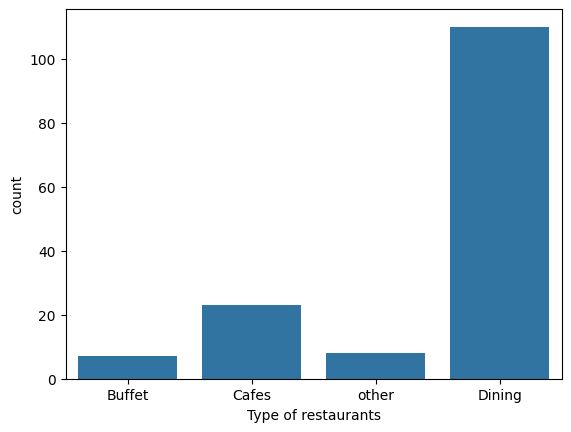

In [8]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurants")

**Conclusion: Majority of customers fall into the dining category.**

**Question 2: What are the ratings that the maority of restaurants have received ?**

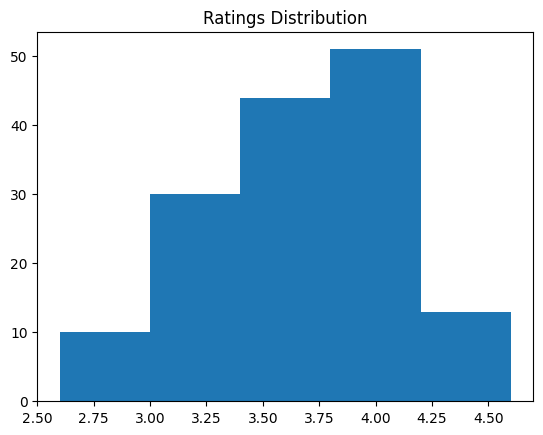

In [11]:
plt.hist(dataframe['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

**Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.**

**Question 3: Zomato has observed that most couples order most of their food online. What is their average spending on each order ?**

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

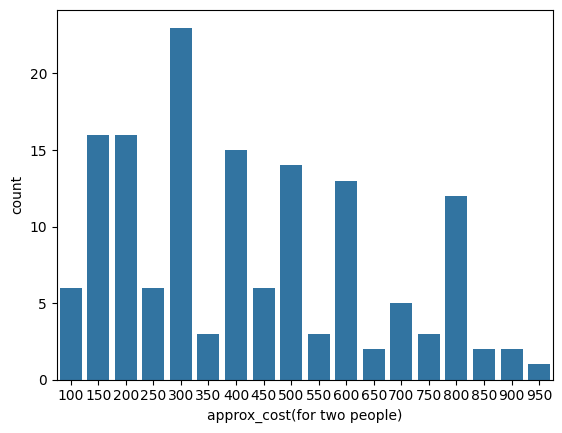

In [13]:
couple_data= dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

**Conclusion: The average spending on each order is Rs300.***

**Question 4: which mode (online or offline) has received the maximum ratings ?**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='online_order', ylabel='rate'>

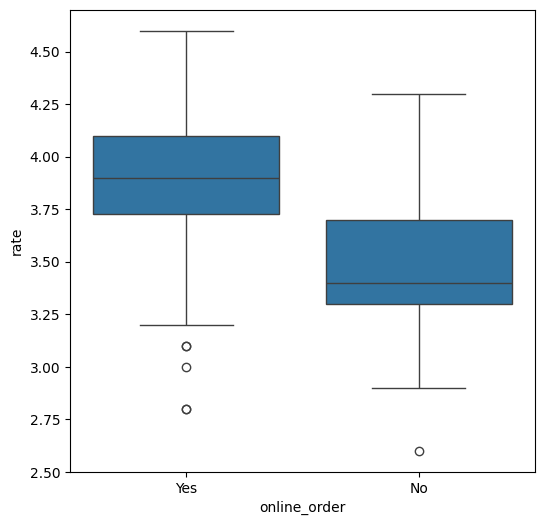

In [14]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe)

**Conclusion: Offline orders received lower ratings as compared to online orders, which obtained excellent ratings.**